```py
model = models.Sequential()
model.add(layers.Embedding(max_features, 128, input_length=maxlen))
model.add(layers.Bidirectional(layers.LSTM(64)))
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()
```

stacked bidirectional LSTM. <br>
return_sequences=True로 설정

```py
model1 = models.Sequential()
model1.add(layers.Embedding(max_features, 128, input_length=maxlen))
model1.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
model1.add(layers.Bidirectional(layers.LSTM(64)))
model1.add(layers.Dense(2, activation = 'softmax'))
model1.summary()
```

# LSTM 실습

In [1]:
from tensorflow.keras.datasets import imdb
max_features = 20000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [2]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [2]:
from tensorflow.keras.preprocessing import sequence
max_len = 400
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [6]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [9]:
from tensorflow.keras import layers
from tensorflow.keras import models

LSTM

In [32]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 64))
model.add(layers.LSTM(32))

################## lstm ######################################
# 8320 = (3232   +  3232       +32)  *  4
################## lstm ######################################

model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          1280000   
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 2)                 34        
                                                                 
Total params: 1,292,978
Trainable params: 1,292,978
Non-trainable params: 0
_________________________________________________________________


In [33]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
history = model.fit(x_train, y_train_one_hot, epochs=5, batch_size=128, validation_split=0.1)

Epoch 1/5
176/176 [==============================] - 8s 34ms/step - loss: 0.5019 - accuracy: 0.7582 - val_loss: 0.3290 - val_accuracy: 0.8704
Epoch 2/5
176/176 [==============================] - 5s 28ms/step - loss: 0.2556 - accuracy: 0.9021 - val_loss: 0.2879 - val_accuracy: 0.8856
Epoch 3/5
176/176 [==============================] - 5s 29ms/step - loss: 0.1865 - accuracy: 0.9315 - val_loss: 0.3312 - val_accuracy: 0.8756
Epoch 4/5
176/176 [==============================] - 5s 29ms/step - loss: 0.1522 - accuracy: 0.9445 - val_loss: 0.3378 - val_accuracy: 0.8908
Epoch 5/5
176/176 [==============================] - 5s 30ms/step - loss: 0.1246 - accuracy: 0.9565 - val_loss: 0.3123 - val_accuracy: 0.8936


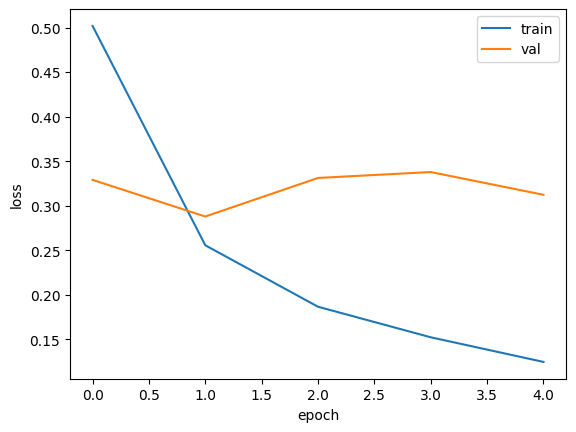

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [36]:
test_loss, test_acc = model.evaluate(x_test,y_test_one_hot)

782/782 [==============================] - 10s 13ms/step - loss: 0.3485 - accuracy: 0.8763


In [37]:
print('test_acc:', test_acc)

test_acc: 0.8762800097465515


In [38]:
model.predict(x_test[0:1])

1/1 [==============================] - 0s 342ms/step


array([[9.9963343e-01, 3.6660460e-04]], dtype=float32)